In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [ ]:
from google.colab import files
files.upload()

Saving teleCust1000t.csv to teleCust1000t (1).csv


{'teleCust1000t (1).csv': b'region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat\n2,13,44,1,9,64.000,4,5,0.000,0,2,1\n3,11,33,1,7,136.000,5,5,0.000,0,6,4\n3,68,52,1,24,116.000,1,29,0.000,1,2,3\n2,33,33,0,12,33.000,2,0,0.000,1,1,1\n2,23,30,1,9,30.000,1,2,0.000,0,4,3\n2,41,39,0,17,78.000,2,16,0.000,1,1,3\n3,45,22,1,2,19.000,2,4,0.000,1,5,2\n2,38,35,0,5,76.000,2,10,0.000,0,3,4\n3,45,59,1,7,166.000,4,31,0.000,0,5,3\n1,68,41,1,21,72.000,1,22,0.000,0,3,2\n2,5,33,0,10,125.000,4,5,0.000,1,1,1\n3,7,35,0,14,80.000,2,15,0.000,1,1,3\n1,41,38,1,8,37.000,2,9,0.000,1,3,1\n2,57,54,1,30,115.000,4,23,0.000,1,3,4\n2,9,46,0,3,25.000,1,8,0.000,1,2,1\n1,29,38,1,12,75.000,5,1,0.000,0,4,2\n3,60,57,0,38,162.000,2,30,0.000,0,1,3\n3,34,48,0,3,49.000,2,6,0.000,1,3,3\n2,1,24,0,3,20.000,1,3,0.000,0,1,1\n1,26,29,1,3,77.000,4,2,0.000,0,4,4\n3,6,30,0,7,16.000,3,1,0.000,1,1,2\n1,68,52,1,17,120.000,1,24,0.000,0,2,1\n3,53,33,0,10,101.000,5,4,0.000,1,2,4\n3,55,48,1,19,67.000,1,25,0.000,0,3,1\n3,

In [ ]:
df=pd.read_csv("teleCust1000t.csv")

In [ ]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [ ]:
# The value_counts() function is then applied to the selected column.
# It returns a Series containing counts of unique values in the 'custcat' column.
# The index of the Series consists of the unique values found in
# the 'custcat' column, and the corresponding values are the counts of each unique value.


df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

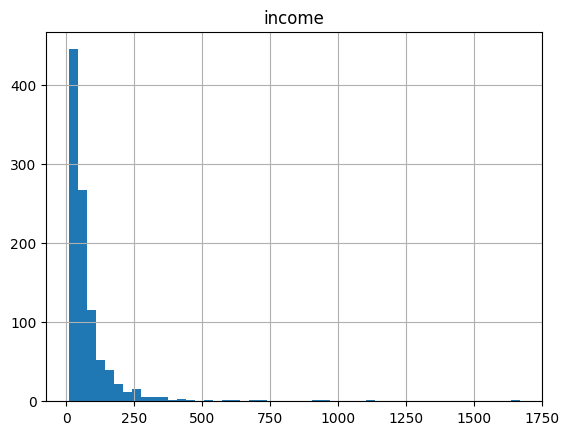

In [ ]:
df.hist(column='income', bins=50)

In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [ ]:
#now we convert the dataframe to a numpy array
#we can use any of the two ways to achieve this

# x=df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
# x[0:5]

X=np.asanyarray(df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']])
X

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [ ]:
y=np.asanyarray(df['custcat'])
y

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2, 1, 3, 1, 4, 1, 2, 3, 3, 1, 4, 2, 1,
       4, 1, 3, 3, 4, 3, 1, 2, 2, 4, 3, 2, 4, 2, 4, 3, 3, 3, 3, 3, 1, 4,
       3, 2, 2, 4, 1, 3, 1, 2, 4, 1, 1, 1, 2, 1, 3, 2, 3, 4, 1, 4, 4, 1,
       3, 3, 1, 1, 1, 2, 1, 2, 3, 1, 3, 1, 3, 4, 4, 1, 4, 3, 2, 1, 2, 4,
       4, 3, 2, 1, 2, 4, 1, 4, 3, 2, 3, 2, 4, 3, 3, 2, 2, 2, 1, 4, 1, 2,
       2, 2, 1, 2, 3, 1, 3, 3, 3, 1, 1, 1, 1, 2, 1, 2, 4, 2, 2, 4, 3, 1,
       4, 2, 3, 1, 1, 3, 3, 4, 4, 3, 4, 2, 3, 1, 4, 2, 2, 2, 1, 3, 4, 4,
       4, 3, 1, 1, 2, 3, 3, 3, 1, 3, 2, 2, 4, 1, 1, 2, 4, 1, 4, 1, 2, 1,
       3, 4, 4, 1, 4, 1, 2, 2, 2, 1, 1, 2, 3, 3, 1, 4, 2, 3, 4, 1, 1, 3,
       1, 4, 1, 4, 2, 2, 4, 1, 3, 4, 3, 3, 1, 1, 1, 2, 2, 1, 3, 4, 4, 1,
       3, 4, 1, 3, 1, 4, 4, 1, 3, 3, 3, 3, 2, 1, 4, 2, 4, 4, 1, 4, 1, 4,
       3, 2, 1, 3, 2, 1, 1, 2, 1, 4, 2, 2, 4, 3, 2, 1, 4, 4, 4, 1, 3, 2,
       1, 1, 3, 3, 3, 1, 3, 2, 4, 1, 3, 2, 2, 3, 3, 1, 4, 4, 3, 2, 3, 3,
       4, 3, 3, 2, 4, 3, 2, 3, 4, 4, 3, 1, 4, 2, 3,

In [ ]:
from sklearn.model_selection import train_test_split

# When you use train_test_split to divide your dataset into a training set and a testing set, there is an element of randomness involved.
# The function randomly selects which data points go into the training set and which go into the testing set.
# However, if you want the split to be the same every time you run your code, you can set the random_state parameter to a specific value.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)


# #shape() returns the number of rows and columns
# For a 1D array, it would be something like (n,),
# for a 2D array, it would be (m, n), and for a 3D array, it would be (l, m, n), and so on.

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [ ]:
#we need to preprocess this values because there are different features with larger magnitudes
#if we dont standardize the data then more value would be given to larger magnitude features resulting in biased models
#so here using StandardScaler() we convert the data into a standardized or z-score form

X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train_norm[0:5]

array([[-1.28618818e+00, -1.53085556e+00, -8.49354628e-01,
         1.00752834e+00, -7.46393214e-01, -4.83608776e-01,
         1.12305195e+00, -7.02283455e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02,  2.51253999e-01,  3.44957012e-01,
         1.00752834e+00,  2.45326718e-01, -2.71543263e-01,
        -5.40728715e-01, -1.25385370e-04, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-1.28618818e+00, -7.80493639e-01, -6.90113076e-01,
         1.00752834e+00, -5.21892614e-02, -4.92444839e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02, -1.53085556e+00, -3.71629972e-01,
        -9.92527915e-01,  1.46154725e-01, -4.74772713e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
         9.90049504e-01, -9.33814526e-01],
       [ 1.19022709e+00, -2.17722200e-01, -6.10492300e-01,
        -9.92527915e-01, -2.50533248e-01,  2.40948394e-01,
  

In [ ]:
# Standardizing the target variable might make the results less interpretable.
# For example, if you're predicting house prices, it's more intuitive to have predictions in the original units (e.g., dollars)
# rather than in standardized units.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#lets consider the value of k as 4
k=4
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train_norm,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [ ]:
X_test_norm=preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test_norm[0:5]

array([[-1.13100942, -0.93533648, -0.93817795,  1.02020406, -0.36233308,
         0.17102716, -0.58336825,  0.00666863, -0.21707238, -1.13967126,
         1.97590703],
       [-1.13100942, -1.44823286, -0.13972863, -0.98019606,  0.03474427,
        -0.50017376, -0.58336825, -0.56492821, -0.21707238, -1.13967126,
        -0.90337462],
       [-1.13100942, -0.51569399,  1.53701494,  1.02020406, -0.56087175,
         0.45499678,  0.9619781 , -0.75546048, -0.21707238,  0.87744601,
         1.25608662],
       [-1.13100942, -0.74882871, -0.85833302,  1.02020406, -1.15648777,
        -0.70669712,  0.9619781 , -0.85072662, -0.21707238, -1.13967126,
         0.53626621],
       [-1.13100942,  0.51009876, -1.01802288,  1.02020406, -0.75941043,
         0.17102716,  1.73465128, -0.75546048, -0.21707238, -1.13967126,
         1.25608662]])

In [ ]:
yhat=neigh.predict(X_test_norm)
yhat[0:5]

array([3, 1, 3, 2, 4])

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.33


In [ ]:
#lets check for different values of k

k=7
neigh1=KNeighborsClassifier(n_neighbors=k).fit(X_train_norm,y_train)
neigh1

KNeighborsClassifier(n_neighbors=7)

In [ ]:
yhat1=neigh1.predict(X_test_norm)
yhat1[0:5]

array([1, 3, 3, 2, 4])

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh1.predict(X_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat1))

Train set Accuracy:  0.50875
Test set Accuracy:  0.35


In [ ]:
#highest accuracy observed with 40
k=40
neigh2=KNeighborsClassifier(n_neighbors=k).fit(X_train_norm,y_train)
print(neigh2)
yhat2=neigh2.predict(X_test_norm)
print(yhat2[0:5])
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh2.predict(X_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat2))

KNeighborsClassifier(n_neighbors=40)
[1 1 2 1 4]
Train set Accuracy:  0.42875
Test set Accuracy:  0.4


In [ ]:
#looping through different values of k and storing the result
Ks = 300
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_norm,y_train)
    yhat=neigh.predict(X_test_norm)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.32 , 0.315, 0.335, 0.33 , 0.34 , 0.335, 0.35 , 0.34 , 0.335,
       0.345, 0.345, 0.33 , 0.31 , 0.295, 0.325, 0.32 , 0.335, 0.34 ,
       0.35 , 0.36 , 0.37 , 0.375, 0.375, 0.365, 0.38 , 0.365, 0.35 ,
       0.37 , 0.385, 0.375, 0.38 , 0.38 , 0.37 , 0.365, 0.375, 0.37 ,
       0.37 , 0.38 , 0.395, 0.4  , 0.39 , 0.39 , 0.39 , 0.395, 0.405,
       0.395, 0.395, 0.38 , 0.365, 0.37 , 0.375, 0.365, 0.375, 0.365,
       0.365, 0.375, 0.37 , 0.355, 0.35 , 0.35 , 0.375, 0.37 , 0.375,
       0.38 , 0.37 , 0.365, 0.37 , 0.37 , 0.375, 0.365, 0.375, 0.355,
       0.365, 0.37 , 0.38 , 0.385, 0.35 , 0.365, 0.35 , 0.355, 0.36 ,
       0.355, 0.36 , 0.35 , 0.355, 0.355, 0.36 , 0.35 , 0.35 , 0.35 ,
       0.345, 0.345, 0.355, 0.355, 0.355, 0.35 , 0.345, 0.345, 0.35 ,
       0.35 , 0.34 , 0.34 , 0.345, 0.33 , 0.345, 0.335, 0.35 , 0.35 ,
       0.335, 0.325, 0.32 , 0.33 , 0.335, 0.345, 0.34 , 0.34 , 0.345,
       0.34 , 0.345, 0.345, 0.345, 0.34 , 0.34 , 0.345, 0.355, 0.355,
       0.36 , 0.34 ,

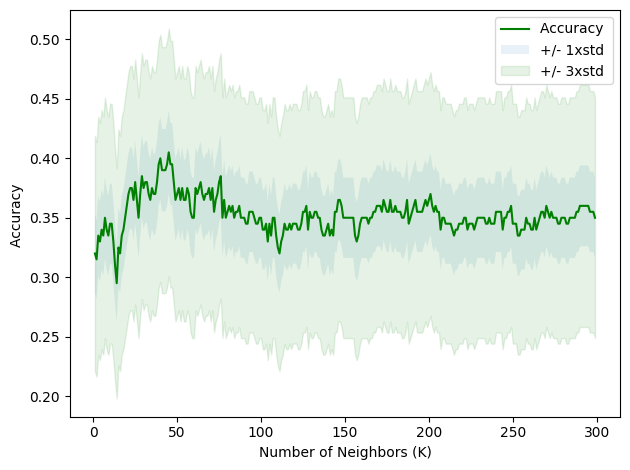

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.405 with k= 45
